# Project 1

### Import data 

In [1]:
import numpy as np
import pandas as pd
abalone = pd.read_csv("abalone.data",header = None)
abalone.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Data cleaning

##### Checking correlation between features

In [2]:
corr_matrix = abalone.corr()
# visualize
import seaborn as sns
%matplotlib inline
cmap = sns.diverging_palette(5, 250, as_cmap = True)

def magnify():
    return [dict(selector = "th",
                 props = [("font-size", "7pt")]),
            dict(selector = "td",
                 props = [('padding', "0em 0em")]),
            dict(selector = "th:hover",
                 props = [("font-size", "12pt")]),
            dict(selector = "tr:hover td:hover",
                 props = [('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis = 1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of features")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


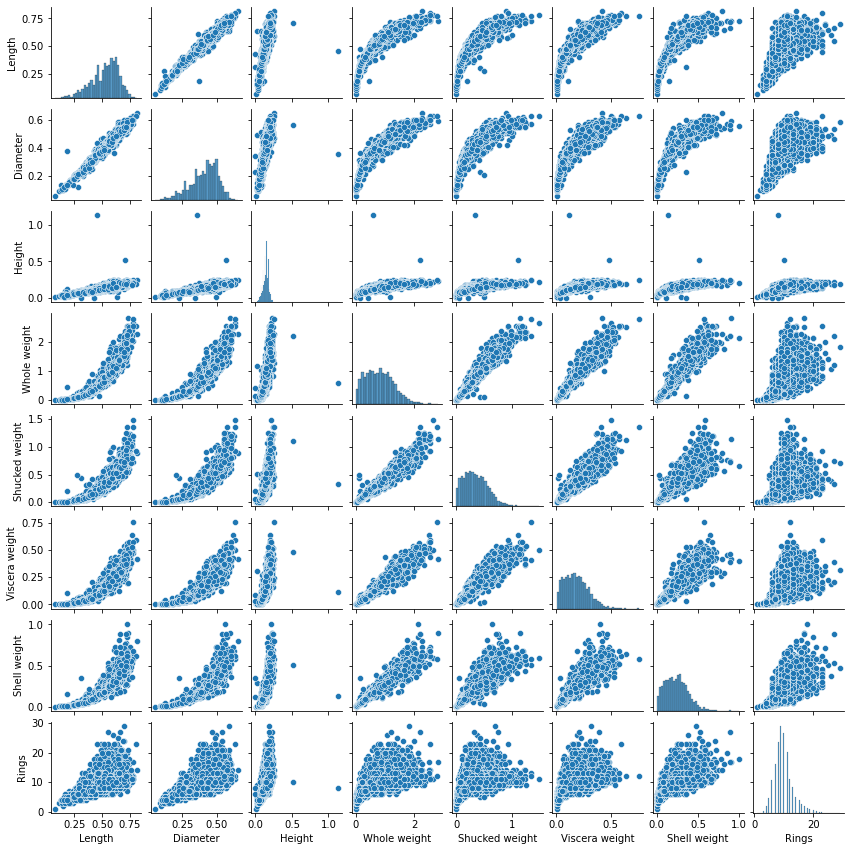

In [3]:
sns.pairplot(abalone,height = 1.5)

##### Drop the features "Shucked weight" and "Diameter". 
The correlation between "Shucked weight" and "Ring" is 0.42, which is less than.0.5. So, it means there is no obvious correlation between "Shucked weight" and "Ring".
The correlation between "Diameter" and "Length" is 0.99. Which means the correlation between the two features is very high. If both of the features are included in the model. There will be multicollinearity problem.

In [4]:
abalone = abalone.drop(["Shucked weight","Diameter"], axis = 1)
abalone.head(10)

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.095,0.5140,0.1010,0.150,15
1,M,0.350,0.090,0.2255,0.0485,0.070,7
2,F,0.530,0.135,0.6770,0.1415,0.210,9
3,M,0.440,0.125,0.5160,0.1140,0.155,10
4,I,0.330,0.080,0.2050,0.0395,0.055,7
5,I,0.425,0.095,0.3515,0.0775,0.120,8
6,F,0.530,0.150,0.7775,0.1415,0.330,20
7,F,0.545,0.125,0.7680,0.1495,0.260,16
8,M,0.475,0.125,0.5095,0.1125,0.165,9
9,F,0.550,0.150,0.8945,0.1510,0.320,19


<AxesSubplot:>

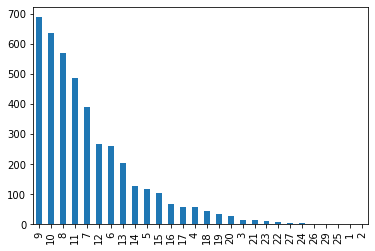

In [5]:
abalone['Rings'].value_counts().plot(kind = 'bar')

##### The plot suggests in this data set the rings of abalone are mostly 9,10 and 8 

### Replacing "M","F" with "A" and one-hot encoding

In [6]:
abalone['Sex'].replace("M","A",inplace = True)
abalone['Sex'].replace("F","A",inplace = True)
print(abalone.head(10))
abalone_sex = abalone[['Sex']]

  Sex  Length  Height  Whole weight  Viscera weight  Shell weight  Rings
0   A   0.455   0.095        0.5140          0.1010         0.150     15
1   A   0.350   0.090        0.2255          0.0485         0.070      7
2   A   0.530   0.135        0.6770          0.1415         0.210      9
3   A   0.440   0.125        0.5160          0.1140         0.155     10
4   I   0.330   0.080        0.2050          0.0395         0.055      7
5   I   0.425   0.095        0.3515          0.0775         0.120      8
6   A   0.530   0.150        0.7775          0.1415         0.330     20
7   A   0.545   0.125        0.7680          0.1495         0.260     16
8   A   0.475   0.125        0.5095          0.1125         0.165      9
9   A   0.550   0.150        0.8945          0.1510         0.320     19


In [7]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
abalone_onehot = hot_encoder.fit_transform(abalone_sex)
abalone['Sex'] = abalone_onehot.toarray()
abalone.head(10)

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.095,0.5140,0.1010,0.150,15
1,1.0,0.350,0.090,0.2255,0.0485,0.070,7
2,1.0,0.530,0.135,0.6770,0.1415,0.210,9
3,1.0,0.440,0.125,0.5160,0.1140,0.155,10
4,0.0,0.330,0.080,0.2050,0.0395,0.055,7
5,0.0,0.425,0.095,0.3515,0.0775,0.120,8
6,1.0,0.530,0.150,0.7775,0.1415,0.330,20
7,1.0,0.545,0.125,0.7680,0.1495,0.260,16
8,1.0,0.475,0.125,0.5095,0.1125,0.165,9
9,1.0,0.550,0.150,0.8945,0.1510,0.320,19


### Train and test set split

In [8]:
from sklearn.model_selection import train_test_split
x = abalone.drop("Rings",axis = 1 ).values
y = abalone["Rings"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 29)

### Train with AdaBoostRegressor based on SVR

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
ada_reg = AdaBoostRegressor(base_estimator = SVR(kernel = "rbf", degree = 0, C = 7, epsilon = 1, gamma = 15), n_estimators = 5,
                           learning_rate = 0.5, random_state = 42)
ada_reg.fit(x_train, y_train)
y_pred_train = ada_reg.predict(x_train)
y_pred_test = ada_reg.predict(x_test)

##### The AdaBoostRegressor is based on SVR. In order to optimisze the SVR regressor, GridSearchCV is used to find the best perparameters. The kernel is defined to be rbf, so "C" and "gamma" are the most related hyperparameters. I chose "C" from range 1 to 10, and "gamma" from range 1 to 50. "epsilon" is asloed consided. The best perparameters are : C = 7, epsilon = 1, gamma = 15. For AdaBoostRegressor based on SVR, we do not need to set n_estimators very high. So the n_estimators equals to  5.  Learning rate is set to be 0.5, which won't make the learning process too slow but also not overshoot the minimum

### Transform prediction to integers

In [11]:
y_pred_train_int = [int(x) for x in np.round(y_pred_train)]
y_pred_test_int = [int(x) for x in np.round(y_pred_test)]

### MAEs of intermediate models

In [13]:
mae_train = []
mae_test = [] 
for e in ada_reg.estimators_:
    mae_train.append(mean_absolute_error(y_train,[int(x) for x in e.predict(x_train)]))
    mae_test.append(mean_absolute_error(y_test,[int(x) for x in e.predict(x_test)]))
    print('Train set mae', mean_absolute_error(y_train,[int(x) for x in e.predict(x_train)]))
    print('Test set mae', mean_absolute_error(y_test,[int(x) for x in e.predict(x_test)]))
    print() 

Train set mae 1.5059154929577465
Test set mae 1.6618819776714513

Train set mae 1.484225352112676
Test set mae 1.5996810207336523

Train set mae 1.5036619718309858
Test set mae 1.6411483253588517

Train set mae 1.5028169014084507
Test set mae 1.6555023923444976

Train set mae 1.5709859154929577
Test set mae 1.7607655502392345



### MAE of the final model

In [14]:
MAE_train_fin = mean_absolute_error(y_train,y_pred_train_int)
MAE_test_fin = mean_absolute_error(y_test,y_pred_test_int)
mae_train.append(MAE_train_fin)
mae_test.append(MAE_test_fin)
print("MAE of final train set:", MAE_train_fin)
print("MAE of final test set:", MAE_test_fin)

MAE of final train set: 1.4647887323943662
MAE of final test set: 1.6028708133971292


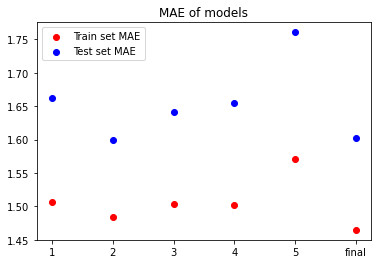

In [15]:
import matplotlib.pyplot as plt
x_label = ["1","2","3","4","5","final"]
plt.scatter(x_label, mae_train, c = "r",alpha = 1,label = "Train set MAE")
plt.scatter(x_label, mae_test, c = "b",alpha = 1,label = "Test set MAE")
plt.legend(loc = "best")
plt.title('MAE of models');

### Predition results on the training and test sets

In [16]:
def scatter_plot(y_train, y_pred_train,y_test, y_pred_test):
    fig = plt.figure(figsize = (16,8))
    ax1 = fig.add_subplot(121)
    ax1.plot(figsize = (8,8))
    ax1.plot(y_train, y_pred_train, '.k')
    
    ax1.plot([0, 30], [0, 30], '--k')
    ax1.plot([0, 30], [2, 32], ':k')
    ax1.plot([2, 32], [0, 30], ':k')
    

    ax1.set_xlim(0, 30)
    ax1.set_ylim(0, 30)
    
    ax1.set_xlabel('True rings')
    ax1.set_ylabel('Predicted rings')
    ax1.set_title('Train')
    
    ax2 = fig.add_subplot(122)
    ax2.plot(figsize = (8,8))
    ax2.plot(y_test, y_pred_test, '.k')
    
    ax2.plot([0, 30], [0, 30], '--k')
    ax2.plot([0, 30], [2, 32], ':k')
    ax2.plot([2, 32], [0, 30], ':k')
    

    ax2.set_xlim(0, 30)
    ax2.set_ylim(0, 30)
    
    ax2.set_xlabel('True rings')
    ax2.set_ylabel('Predicted rings')
    ax2.set_title("Test")

##### In this function two scatterplot are created to compare the number of predicted rings and the true rings.
The predicted numbers are on the Y label, and the true number are on the X label. The middle line is the perfect agreement line. Two dotted lines mean +2/-2 numbers. When a spot lies in the gap of the two dotted lines, it means the number of rings is predicted in an accurate way. The more spots lie in the gap, the better the regression model is.

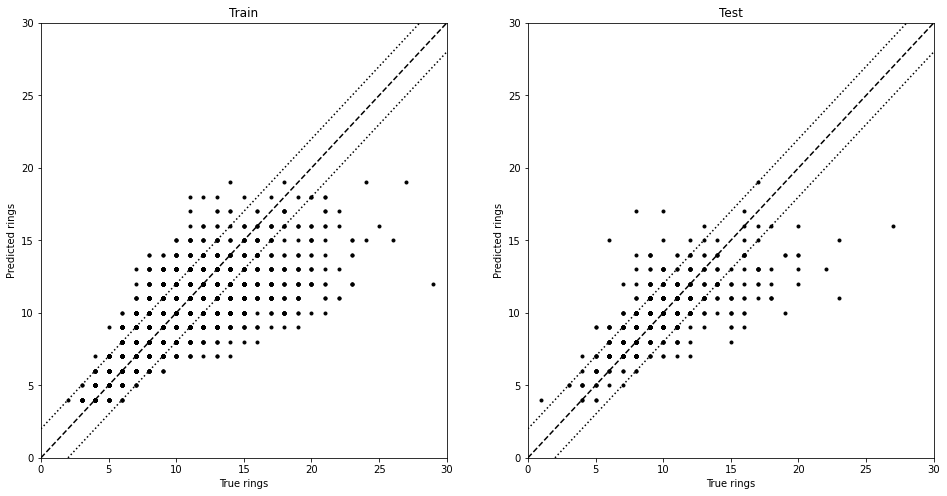

In [17]:
scatter_plot(y_train, y_pred_train_int, y_test, y_pred_test_int)

##### Raw prediction errors

In [18]:
def raw_hist(y_train, y_pred_train, y_test, y_pred_test):
    raw_error_train = []
    raw_error_test = []
    for k in range(len(y_pred_train)):
        raw_error_train.append(y_train[k] - y_pred_train[k])
    for m in range(len(y_pred_test)):
        raw_error_test.append(y_test[m] - y_pred_test[m])
    
    fig = plt.figure(figsize = (16,8))
    plt.subplot(121)
    plt.hist(raw_error_train,bins = 100)
    
    plt.xlabel("Raw error")
    plt.title("Raw error of train set")

    plt.subplot(122)
    plt.hist(raw_error_test,bins = 100)
    plt.xlabel("Raw error")
    plt.title("Raw error of test set")
    

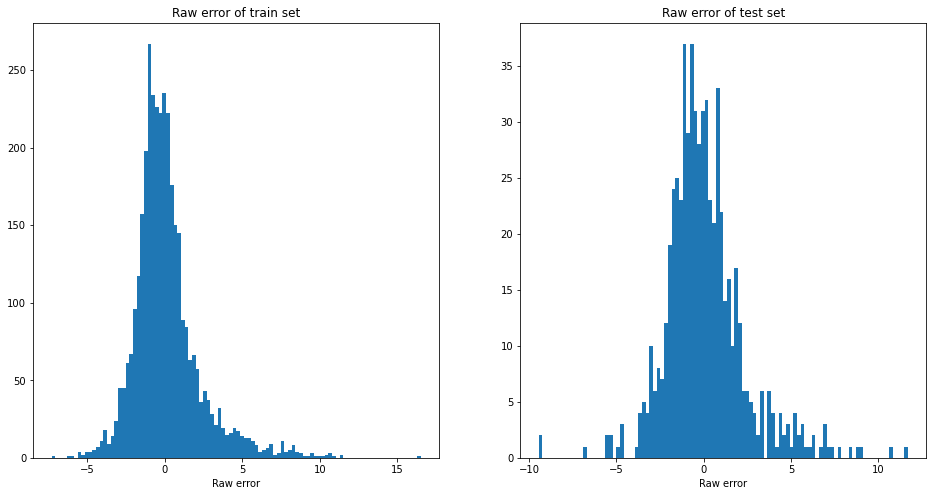

In [19]:
raw_hist(y_train, y_pred_train, y_test, y_pred_test)

#### Comparison of adaboostregressor on train set and test set.
The mae result on train set is smaller than the mae on test set. This suggests the prediction on train set is more accurate than the prediction on test set.Through the histogram, we can find the regressor is not good at predicting big number of rings.On the test set, the raw errors that are bigger than 5 are more than that in the train set. There are also several errors which are less than negative five.In all, the regressor perform better on train set.

# Project 2

### Import data and check distribution

In [20]:
wine= pd.read_csv("winequality-red.csv" , sep = ';')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


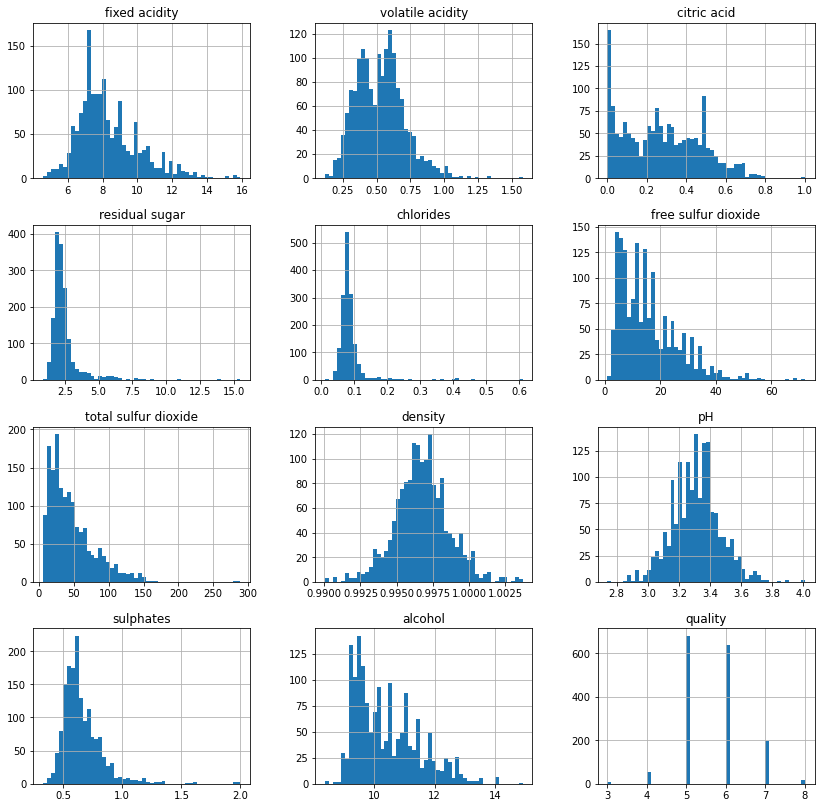

In [22]:
wine.hist(bins = 50,figsize = (14,14))
plt.show()

<AxesSubplot:>

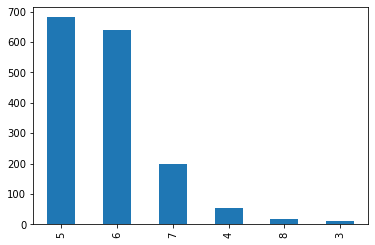

In [23]:
wine['quality'].value_counts().plot(kind='bar')

##### The table suggests most of the numbers of wine quality are 5 and 6

In [24]:
wine.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

##### The correlation table suggests feature "alcohol" and "volatile acidity" have the biggest correlation with wine quality. In all, There is no correlation higher than 0.5, which means there is not any significant correlaiton.

### Train and test split

In [25]:
wine_x = wine.drop("quality",axis = 1).values
wine_y = wine["quality"].values
wx_train, wx_test, wy_train, wy_test = train_test_split(wine_x, wine_y,test_size = 0.15,random_state = 39)

###  RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 30, n_estimators = 9, min_samples_split = 2, min_samples_leaf = 1, random_state = 49, verbose = False)
rfr.fit(wx_train,wy_train)
wy_pred_train = rfr.predict(wx_train)
wy_pred_train_int = [int(x) for x in np.round(wy_pred_train)]
#MAE on train
wine_MAE_train = mean_absolute_error(wy_train,wy_pred_train_int)
print("MAE of train set:", wine_MAE_train)

#MAE on test
wy_pred_test = rfr.predict(wx_test)
wy_pred_test_int = [int(x) for x in np.round(wy_pred_test)]
#MAE on test
wine_MAE_test = mean_absolute_error(wy_test,wy_pred_test_int)
print("MAE of test set:",wine_MAE_test)

MAE of train set: 0.05886681383370125
MAE of test set: 0.35833333333333334


##### I used GridSearchCV to find the best params. Four params are tried: max_depth, n_estimators, min_samples_split, min_samples_leaf.  By using the best_params and best_score code, I picked out the params needed.

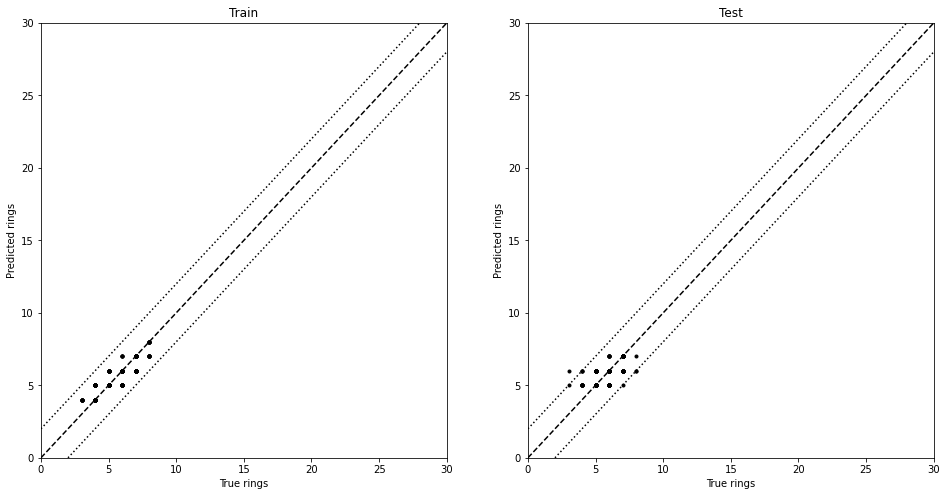

In [27]:
scatter_plot(wy_train, wy_pred_train_int, wy_test, wy_pred_test_int)

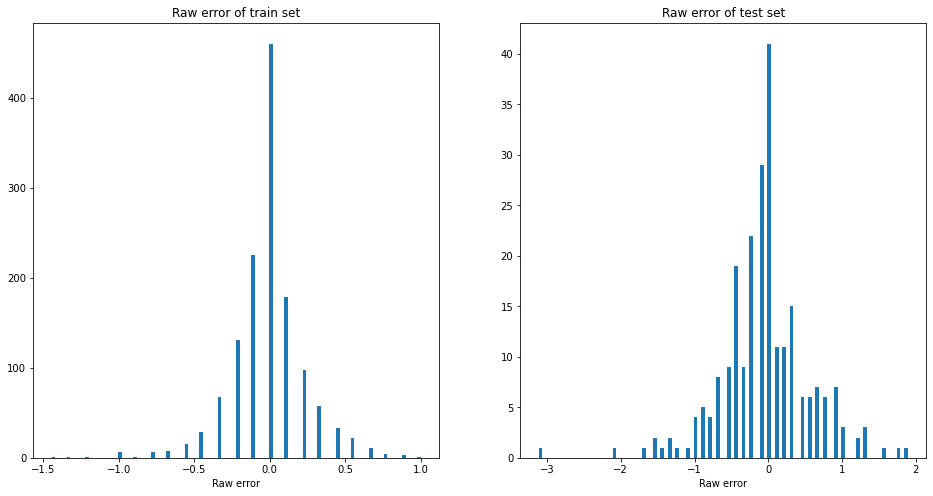

In [28]:
raw_hist(wy_train, wy_pred_train, wy_test, wy_pred_test)

##### The histograms suggest the distribution of raw error for test set is larger than that of train set

### Feature importances selection 

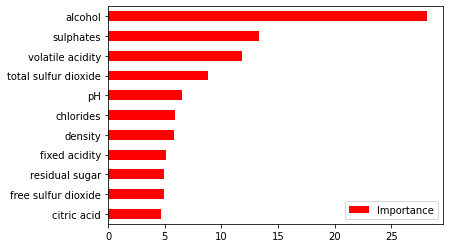

In [45]:
wx_train2 = wine.drop("quality",axis = 1)
Importance = pd.DataFrame({"Importance": rfr.feature_importances_ * 100},
                          index = wx_train2.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh", color="r")
plt.show()

In [47]:
Low_importance_features = Importance[Importance["Importance"] < 5 ]
print(Low_importance_features)
print()
print("Retained features importance:", 100 - Low_importance_features["Importance"].sum() )

                     Importance
citric acid            4.714736
residual sugar         4.940988
free sulfur dioxide    4.915744

Retained features importance: 85.42853224930457


### RFR on retained features

In [48]:
wine_s = wine.drop(["citric acid","residual sugar","free sulfur dioxide"], axis = 1)
wine_s.head(10)

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.075,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.069,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.065,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.073,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.071,102.0,0.9978,3.35,0.80,10.5,5


In [49]:
wine_x2 = wine_s.drop("quality",axis = 1).values
wine_y2 = wine_s["quality"].values
wx_train2, wx_test2, wy_train2, wy_test2 = train_test_split(wine_x2, wine_y2,test_size = 0.15,random_state = 139)

In [50]:
rfr2 = RandomForestRegressor(max_depth = 30, n_estimators = 9, min_samples_split = 2, min_samples_leaf = 1, random_state = 49, verbose = False)
rfr2.fit(wx_train2, wy_train2)
wy_pred_train2 = rfr2.predict(wx_train2)
wy_pred_train_int2 = [int(x) for x in np.round(wy_pred_train2)]
#MAE on train
wine_MAE_train2 = mean_absolute_error(wy_train2, wy_pred_train_int2)
print("MAE of retained train set:", wine_MAE_train2)

#MAE on test
wy_pred_test2 = rfr2.predict(wx_test2)
wy_pred_test_int2 = [int(x) for x in np.round(wy_pred_test2)]
#MAE on test
wine_MAE_test2 = mean_absolute_error(wy_test2, wy_pred_test_int2)
print("MAE of retained test set:", wine_MAE_test2)

MAE of retained train set: 0.05886681383370125
MAE of retained test set: 0.32916666666666666


In [51]:
print("MAE of train set:", wine_MAE_train)
print("MAE of test set:", wine_MAE_test)
print("MAE of retained train set:", wine_MAE_train2)
print("MAE of retained test set:", wine_MAE_test2)

MAE of train set: 0.05886681383370125
MAE of test set: 0.35833333333333334
MAE of retained train set: 0.05886681383370125
MAE of retained test set: 0.32916666666666666


##### By comparing the MAE on the original data set and the retained data set, we can find the MAE on training set are totally the same. However, the regressor on residual data has less MAE. In conclusion, by deleteing the unimportant features, we can simplify the model and promote its performance.